In [58]:
#Import labraries and import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed
import tensorflow as tf


In [2]:
df = pd.read_csv('US302023.csv',index_col="Date", parse_dates=True)
df.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-01-08,"23,787.45","23,680.32","23,864.65","23,581.45",317.42M,1.09%
2019-01-07,"23,531.35","23,474.26","23,687.74","23,301.59",334.20M,0.42%
2019-01-04,"23,433.16","22,894.92","23,518.64","22,894.92",396.02M,3.29%
2019-01-03,"22,686.22","23,176.39","23,176.39","22,638.41",424.24M,-2.83%
2019-01-02,"23,346.24","23,058.61","23,413.47","22,928.59",321.57M,0.08%


In [3]:
df=df.drop(columns=['Change %'], axis=1)
df.head()

,Price,Open,High,Low,Vol.
Date,,,,,
2023-02-09,"33,767.39","34,105.61","34,252.18","33,767.39",204.15M
2023-02-08,"33,949.20","34,132.90","34,159.04","33,901.13",309.66M
2023-02-07,"34,156.85","33,769.78","34,238.10","33,635.52",349.95M
2023-02-06,"33,889.63","33,810.41","33,962.49","33,684.04",283.17M
2023-02-03,"33,925.06","33,885.93","34,178.98","33,813.92",413.67M


In [4]:
df = df.rename(columns={'Vol.': 'Volume'})
df.head()

,Price,Open,High,Low,Volume
Date,,,,,
2023-02-09,"33,767.39","34,105.61","34,252.18","33,767.39",204.15M
2023-02-08,"33,949.20","34,132.90","34,159.04","33,901.13",309.66M
2023-02-07,"34,156.85","33,769.78","34,238.10","33,635.52",349.95M
2023-02-06,"33,889.63","33,810.41","33,962.49","33,684.04",283.17M
2023-02-03,"33,925.06","33,885.93","34,178.98","33,813.92",413.67M


In [5]:
cols_to_convert = ['Price', 'Open', 'High', 'Low', 'Volume']

# Convert the columns from object to float
for col in cols_to_convert:
    df[col] = df[col].str.replace(',', '').str.replace('M', '').astype(float)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2023-02-09 to 2019-01-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1035 non-null   float64
 1   Open    1035 non-null   float64
 2   High    1035 non-null   float64
 3   Low     1035 non-null   float64
 4   Volume  1035 non-null   float64
dtypes: float64(5)
memory usage: 48.5 KB


In [7]:
df['Volume'] = df['Volume'] * 1000000
df.head()

,Price,Open,High,Low,Volume
Date,,,,,
2023-02-09,33767.39,34105.61,34252.18,33767.39,204150000.0
2023-02-08,33949.20,34132.90,34159.04,33901.13,309660000.0
2023-02-07,34156.85,33769.78,34238.10,33635.52,349950000.0
2023-02-06,33889.63,33810.41,33962.49,33684.04,283170000.0
2023-02-03,33925.06,33885.93,34178.98,33813.92,413670000.0


In [8]:
df.describe()

,Price,Open,High,Low,Volume
count,1035.000000,1035.000000,1035.000000,1035.000000,1.035000e+03
mean,30146.066048,30139.891198,30328.862821,29942.308435,3.493697e+08
std,3891.461163,3892.327686,3888.390188,3897.070329,1.095104e+08
min,18591.930000,19028.360000,19121.010000,18213.650000,9.529000e+07
25%,26723.335000,26722.325000,26856.770000,26586.435000,2.802950e+08
50%,30199.870000,30204.520000,30329.420000,29997.980000,3.285800e+08
75%,33914.510000,33872.495000,34081.575000,33663.995000,3.913750e+08
max,36799.650000,36722.600000,36952.650000,36636.000000,9.226800e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2023-02-09 to 2019-01-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1035 non-null   float64
 1   Open    1035 non-null   float64
 2   High    1035 non-null   float64
 3   Low     1035 non-null   float64
 4   Volume  1035 non-null   float64
dtypes: float64(5)
memory usage: 48.5 KB


In [10]:
df.isnull().sum()

Price     0
Open      0
High      0
Low       0
Volume    0
dtype: int64

In [11]:
Y = df[['Price']]
X = df[['Open', 'Volume', 'Low', 'High']]

In [12]:
#Splitting the data into tain and test data
X_train, X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [13]:
# Define the model
df.shape

(1035, 5)

In [52]:
# # Build the model with LSTM Major L but recommended
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.LSTM(10,input_shape=(20,4),batch_size=32))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(64, activation='relu'))x
# model.add(Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

In [63]:
model = tf.keras.Sequential()
model.add(TimeDistributed(Dense(10), input_shape=(None, 20, 4)))
model.add(LSTM(10))
model.add(Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

ValueError: Input 0 of layer "lstm_16" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, None, 20, 10)

In [62]:
# Train the model
model.fit(X_train, Y_train)

ValueError: in user code:

    File "C:\Users\BIDA19-040\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\BIDA19-040\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\BIDA19-040\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\BIDA19-040\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\BIDA19-040\Anaconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\BIDA19-040\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_18" is incompatible with the layer: expected shape=(None, 20, 4), found shape=(None, 4)


In [ ]:
# model = LinearRegression()

In [ ]:
x_train_pred = model.predict(X_train)
print('The accuracy for my training model is :', x_train_pred)

In [ ]:
x_test_pred = model.predict(X_test)
print('The accuracy for my testing model is :', x_test_pred)

In [ ]:
# XGBoost 
# Training Data
# R-squared Error
r2s = metrics.r2_score(Y_train, x_train_pred)
print('R-squared Error: ', r2s)

#Mean absolute error
meanerror = metrics.mean_absolute_error(Y_train, x_train_pred)
print('Mean Absolute Error: ', meanerror)

#IDk really
error2 = np.sqrt(metrics.mean_absolute_error(Y_train, x_train_pred))
print('Error: ', error2)

In [ ]:
# Test Data
# R-squared Error
r2s2 = metrics.r2_score(Y_test, x_test_pred)
print('R-squared Error: ', r2s2)

#Mean absolute error
meanerror2 = metrics.mean_absolute_error(Y_test, x_test_pred)
print('Mean Absolute Error: ', meanerror2)

#IDk really
error = np.sqrt(metrics.mean_absolute_error(Y_test, x_test_pred))
print('Error: ', error)

In [ ]:
plt.scatter(Y_train, x_train_pred, c = "blue", marker = "s")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [ ]:
X.tail()

In [ ]:
Y.tail()

In [ ]:
input_data = (12689.2, 88142.0, 12469.8, 12756.2)
input_values = np.asarray(input_data)

#Reshaping the arrary to get a single result
input_data_reshaped = input_values.reshape(1, -1)

In [ ]:
anticipated = model.predict(input_data_reshaped)
if input_data[0] < anticipated:
    print(f"Buy!! & TP:{anticipated.round(2)}")
else:
    print(f"Sell!! & TP:{anticipated.round(2)}")

In [ ]:
# 34278.79, 1155000, 33886.57, 34488.24 Close = 34381.28

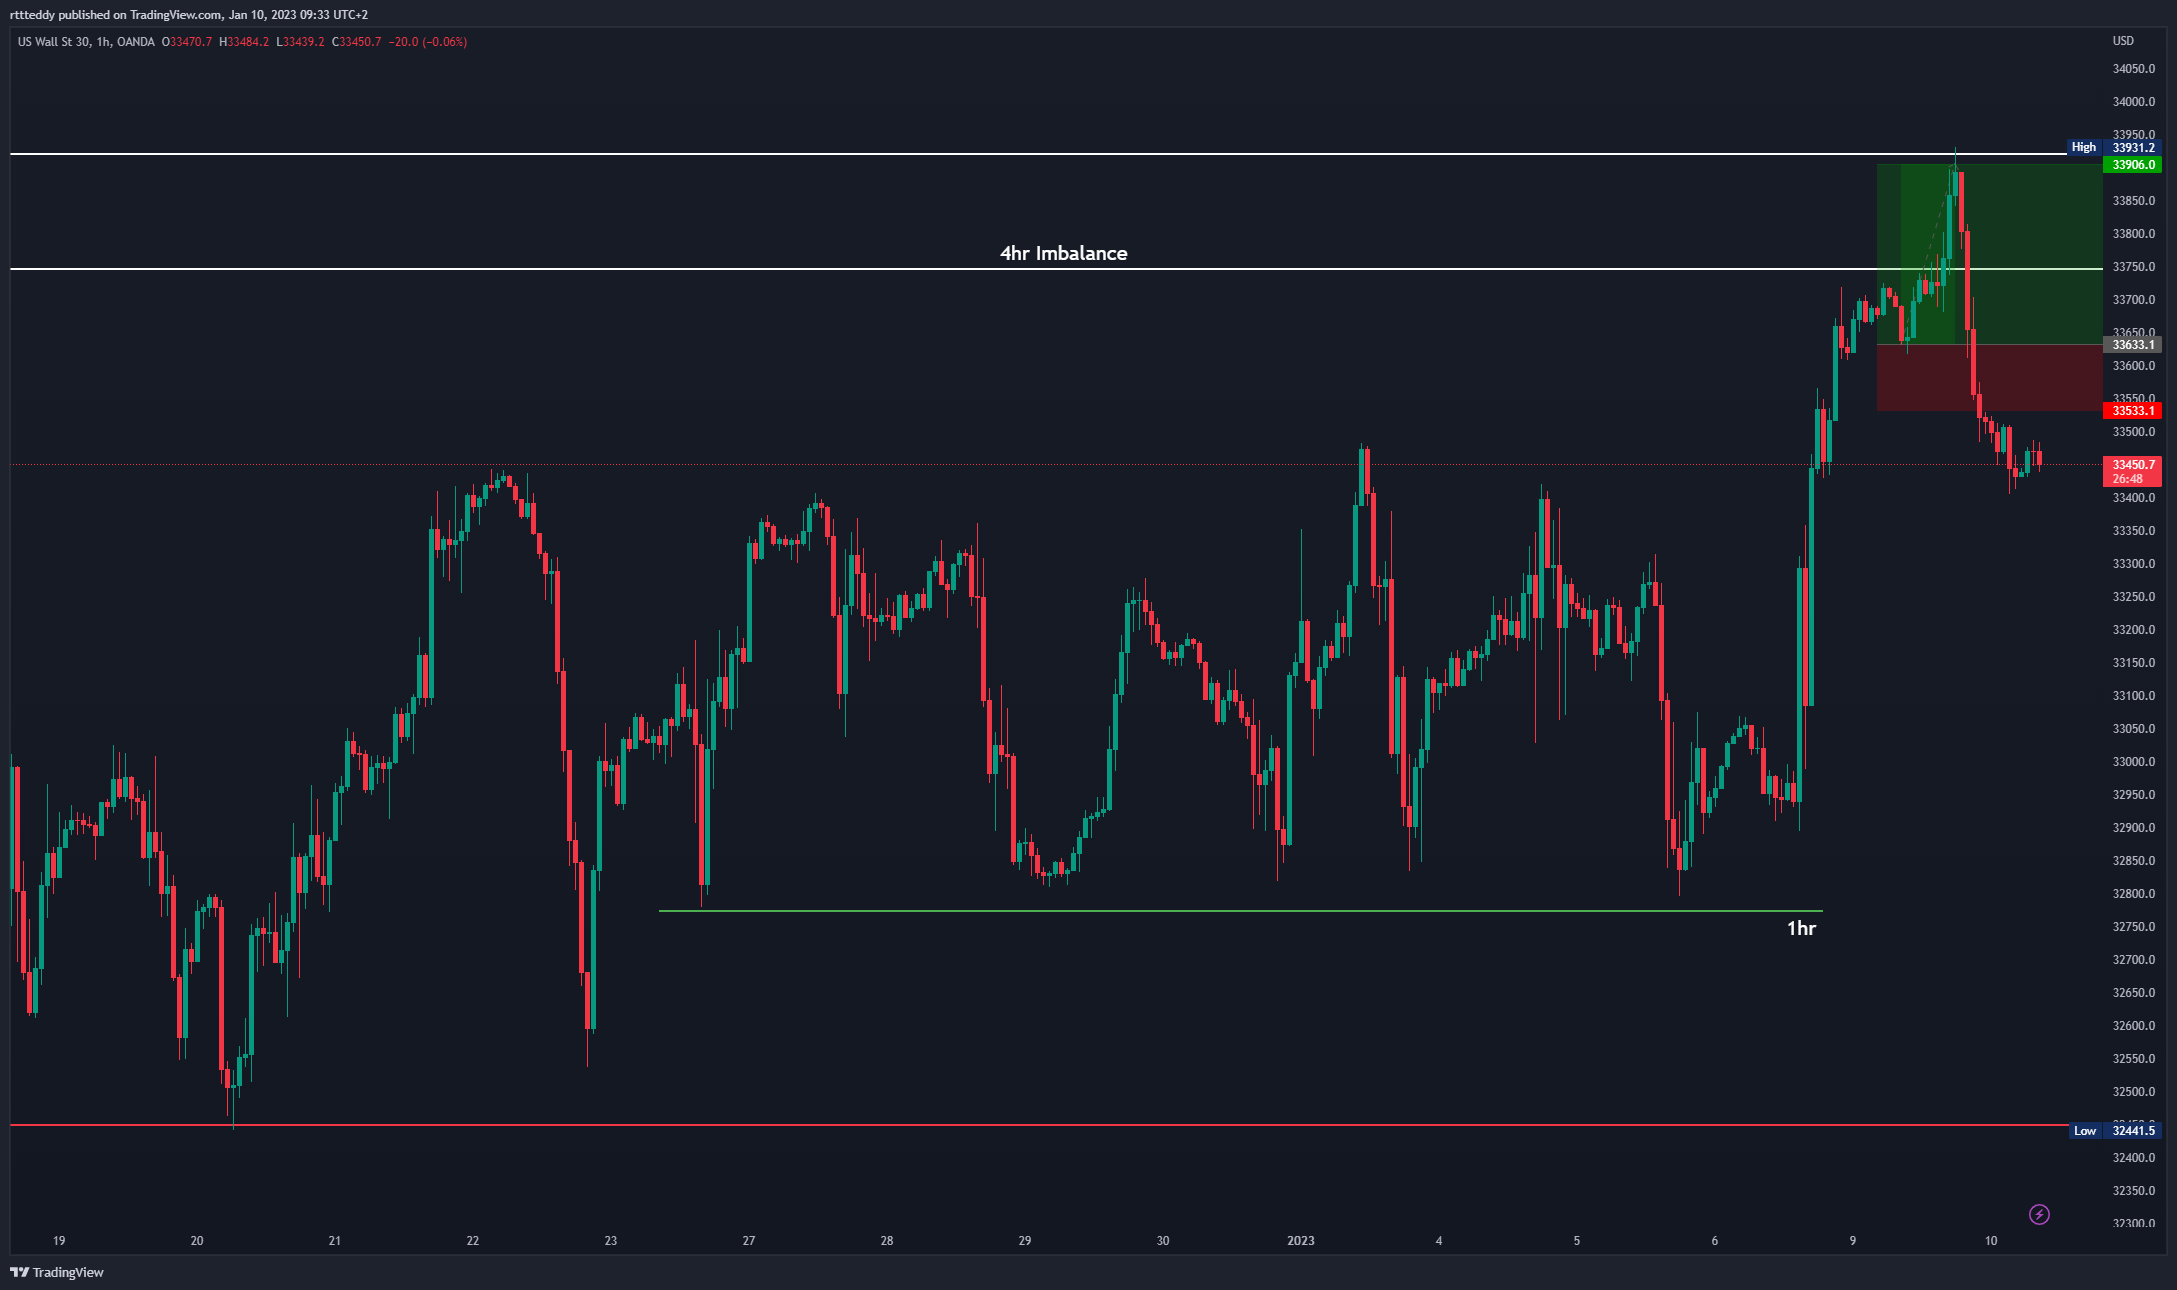

In [1]:
from IPython import display
# 33669.6, 16022000, 33618.5, 33722.0 == 33907.47 Buy
display.Image("US30US-09-01-23.png")

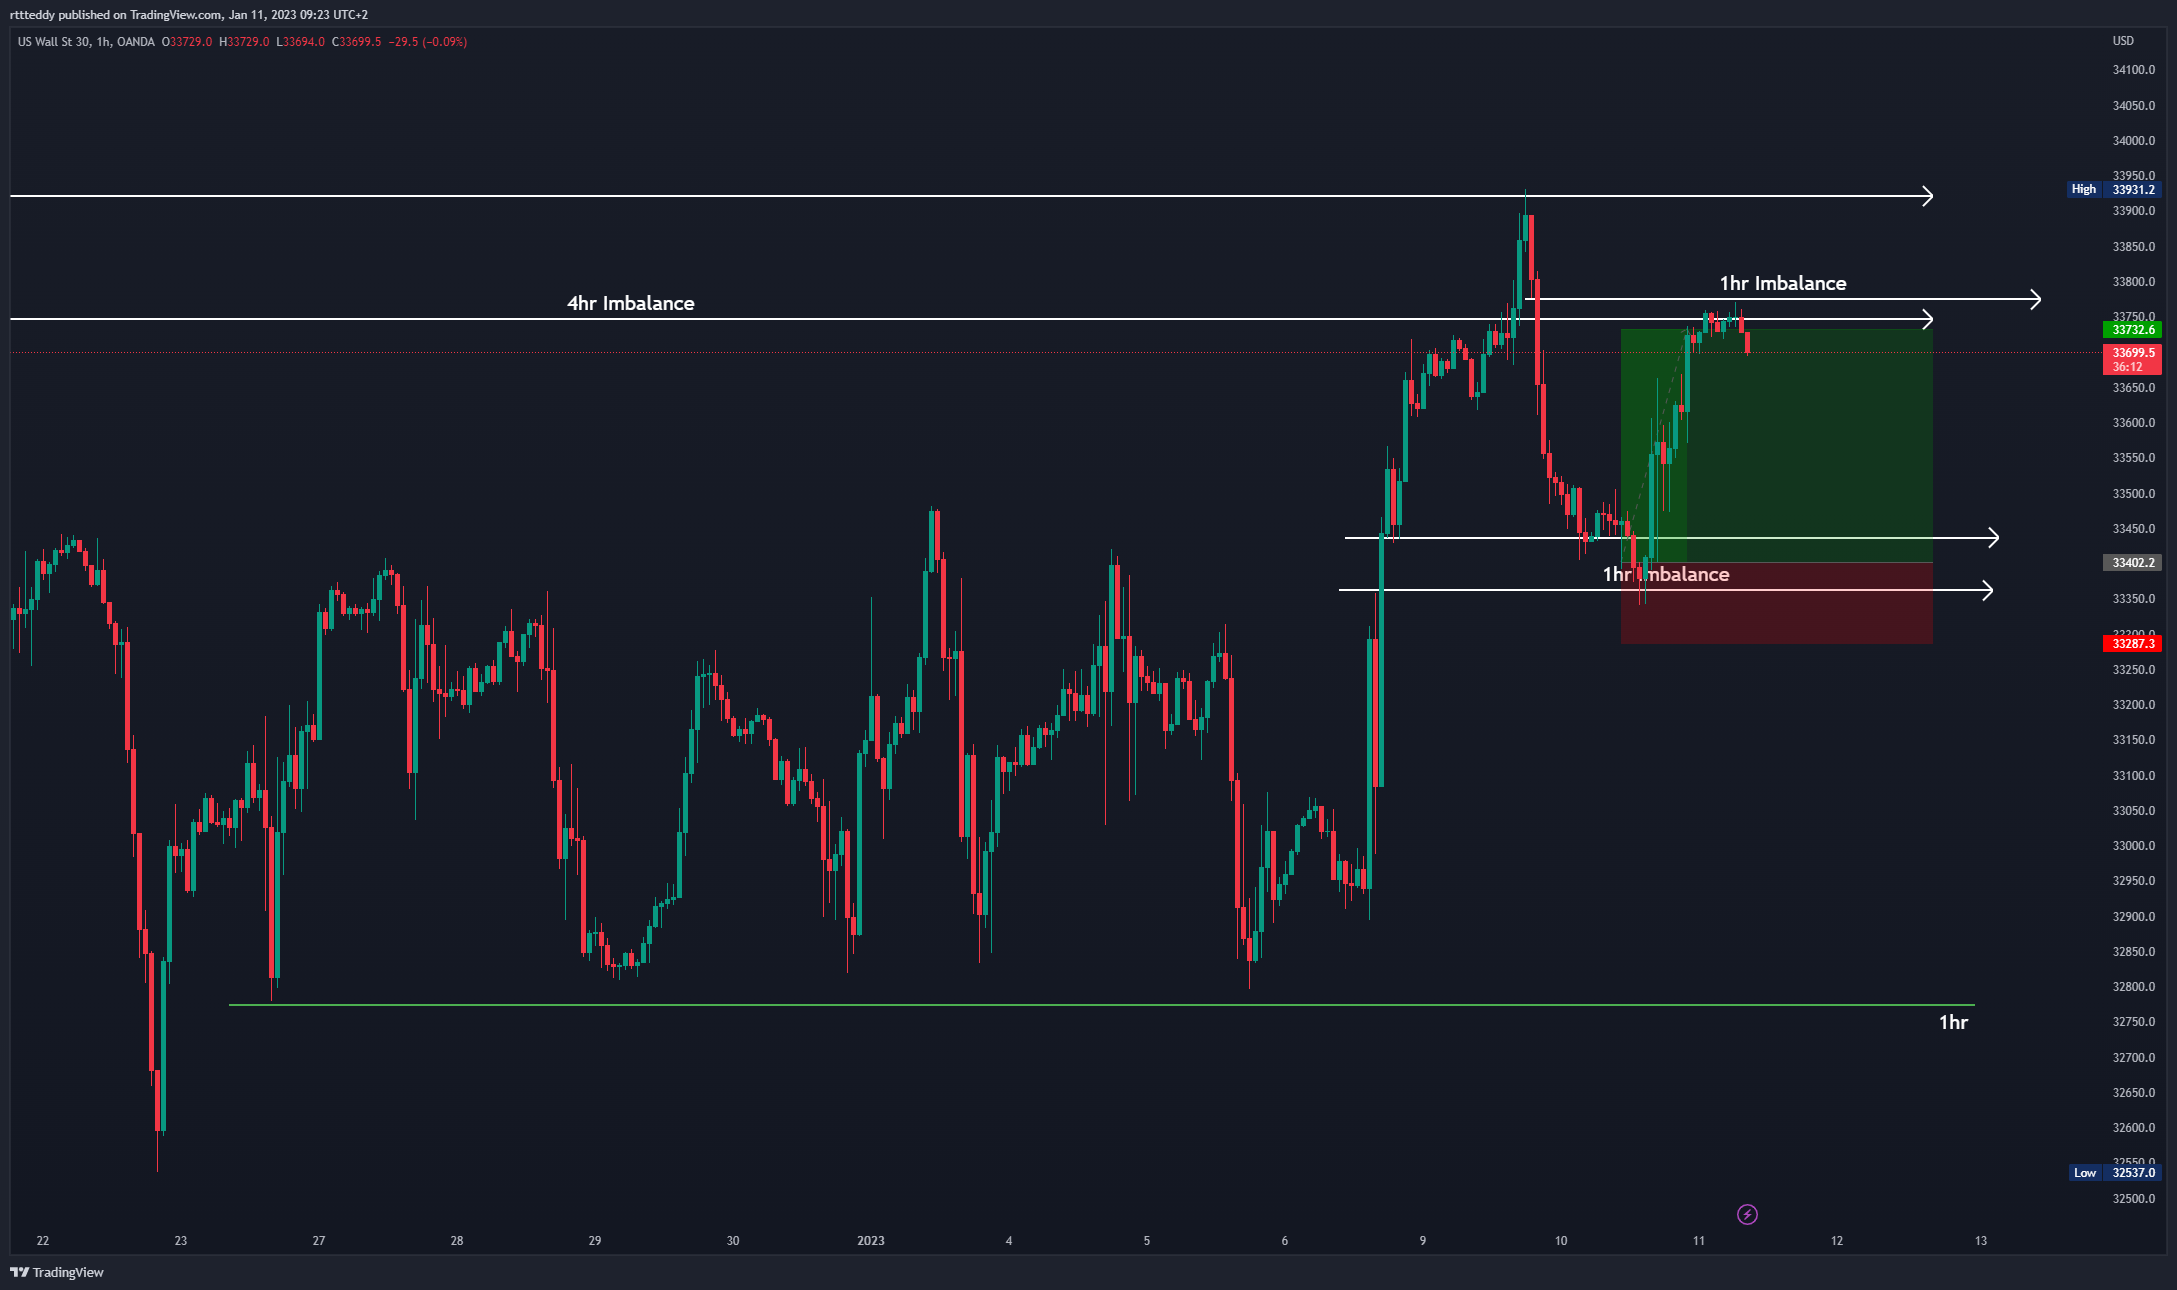

In [2]:
# 33532.9, 13137000, 33408.9, 33532.9 == 33630.64 Buy
# 33532.9, 22744000.0, 33403.2, 33532.9 == 33762.5 Buy
display.Image("US30US-10-01-23.png")

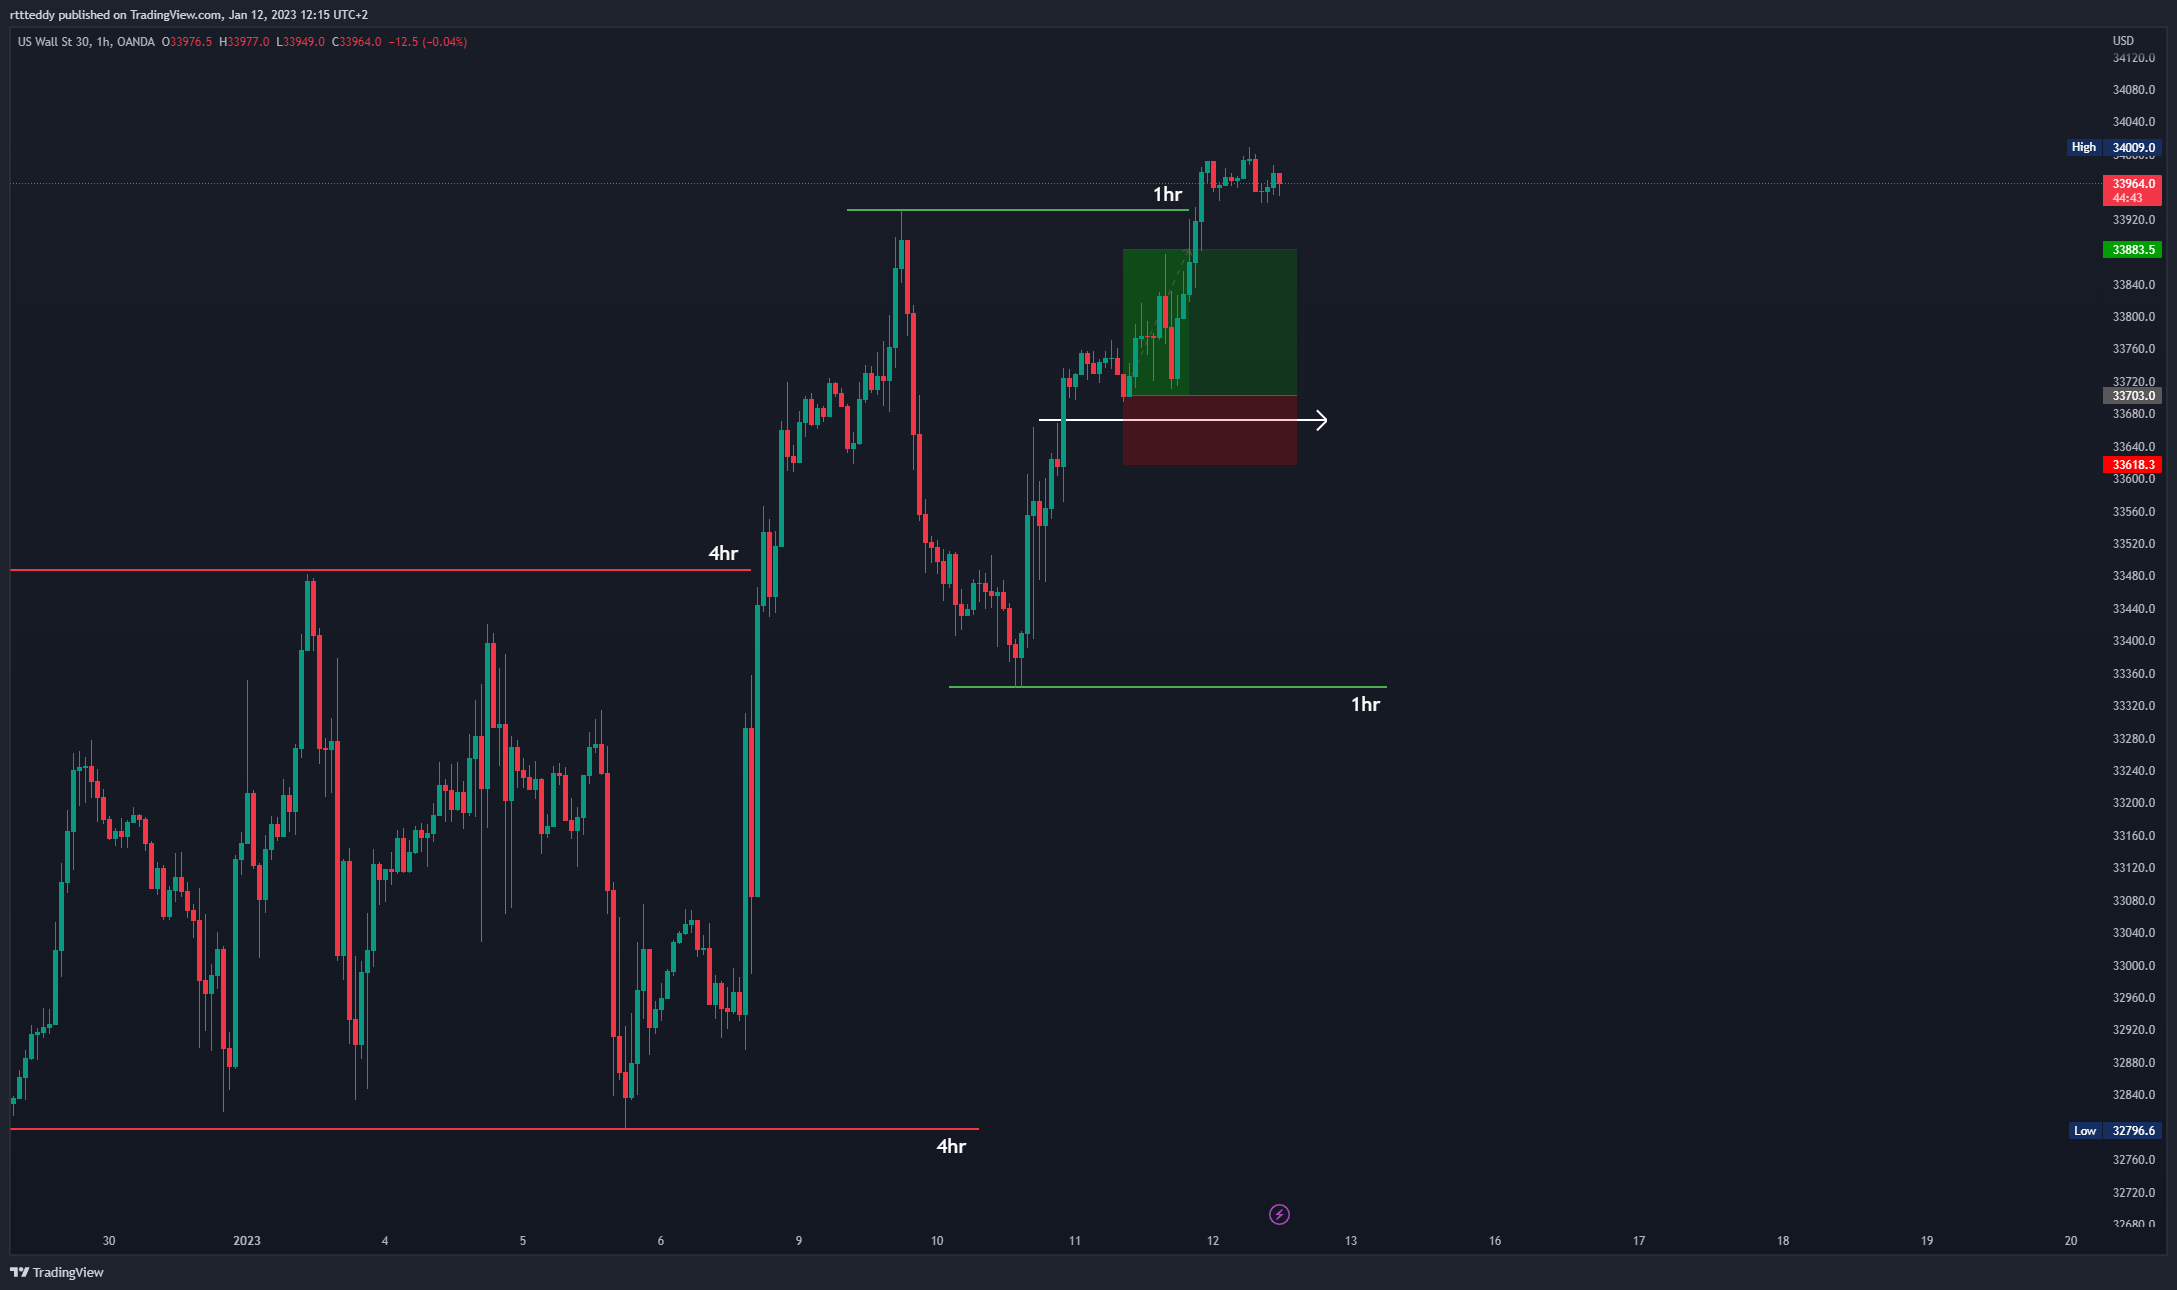

In [3]:
# 33707.6,7687000, 33687.0, 33764.9 == 33855.58 Buy
display.Image("US30-11-01-23.png")

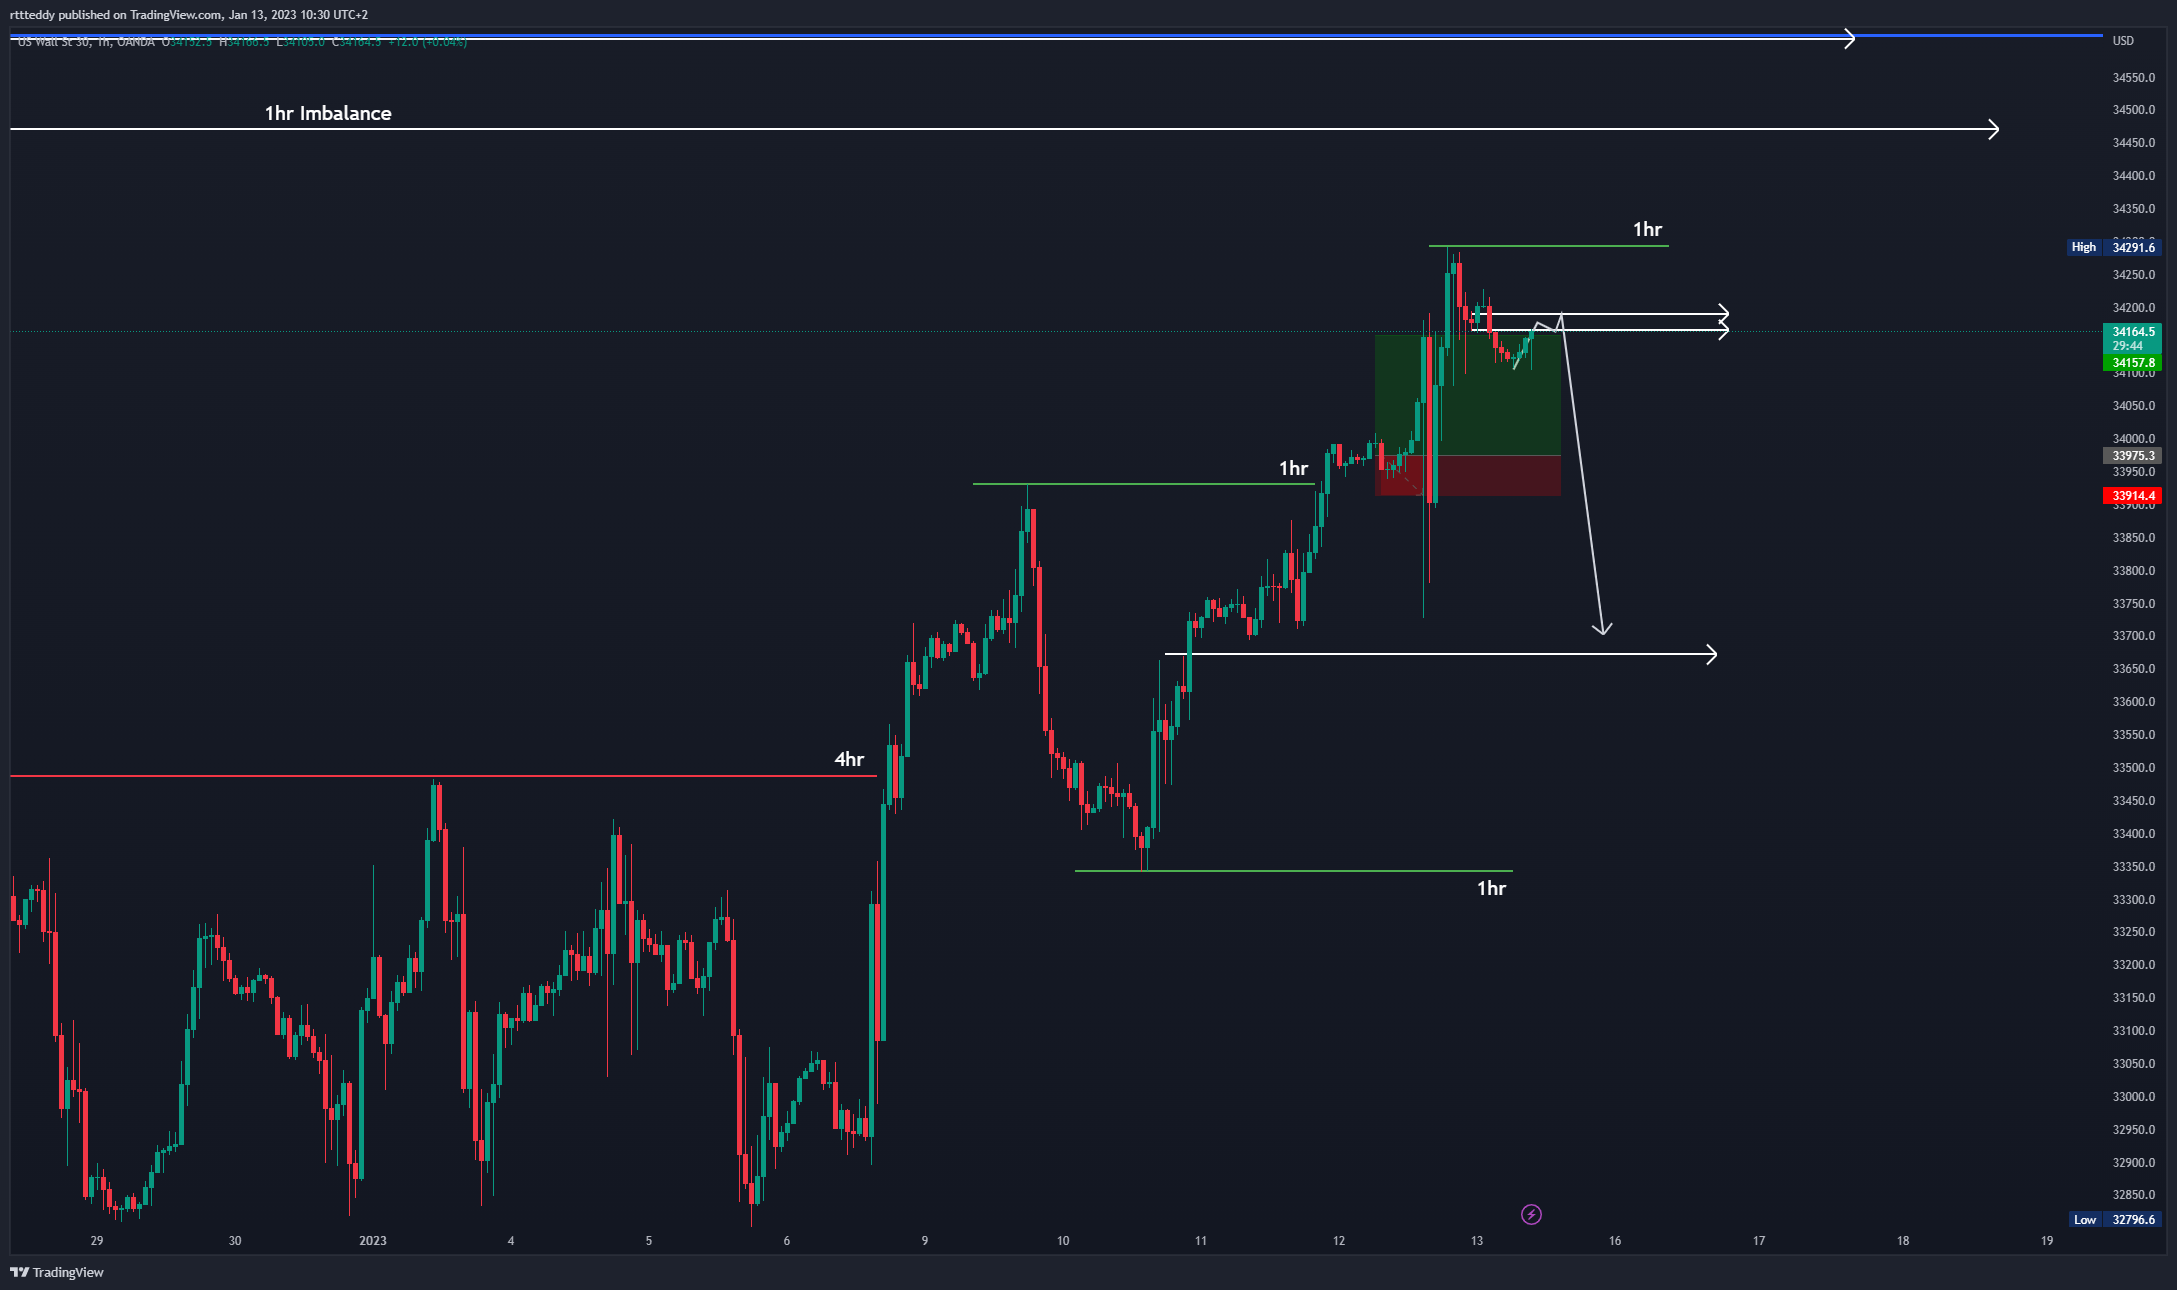

In [4]:
# 33981.5, 12131000, 33931.7, 34000.4 == 34139.95 Buy
display.Image("US30-12-01-23.png")

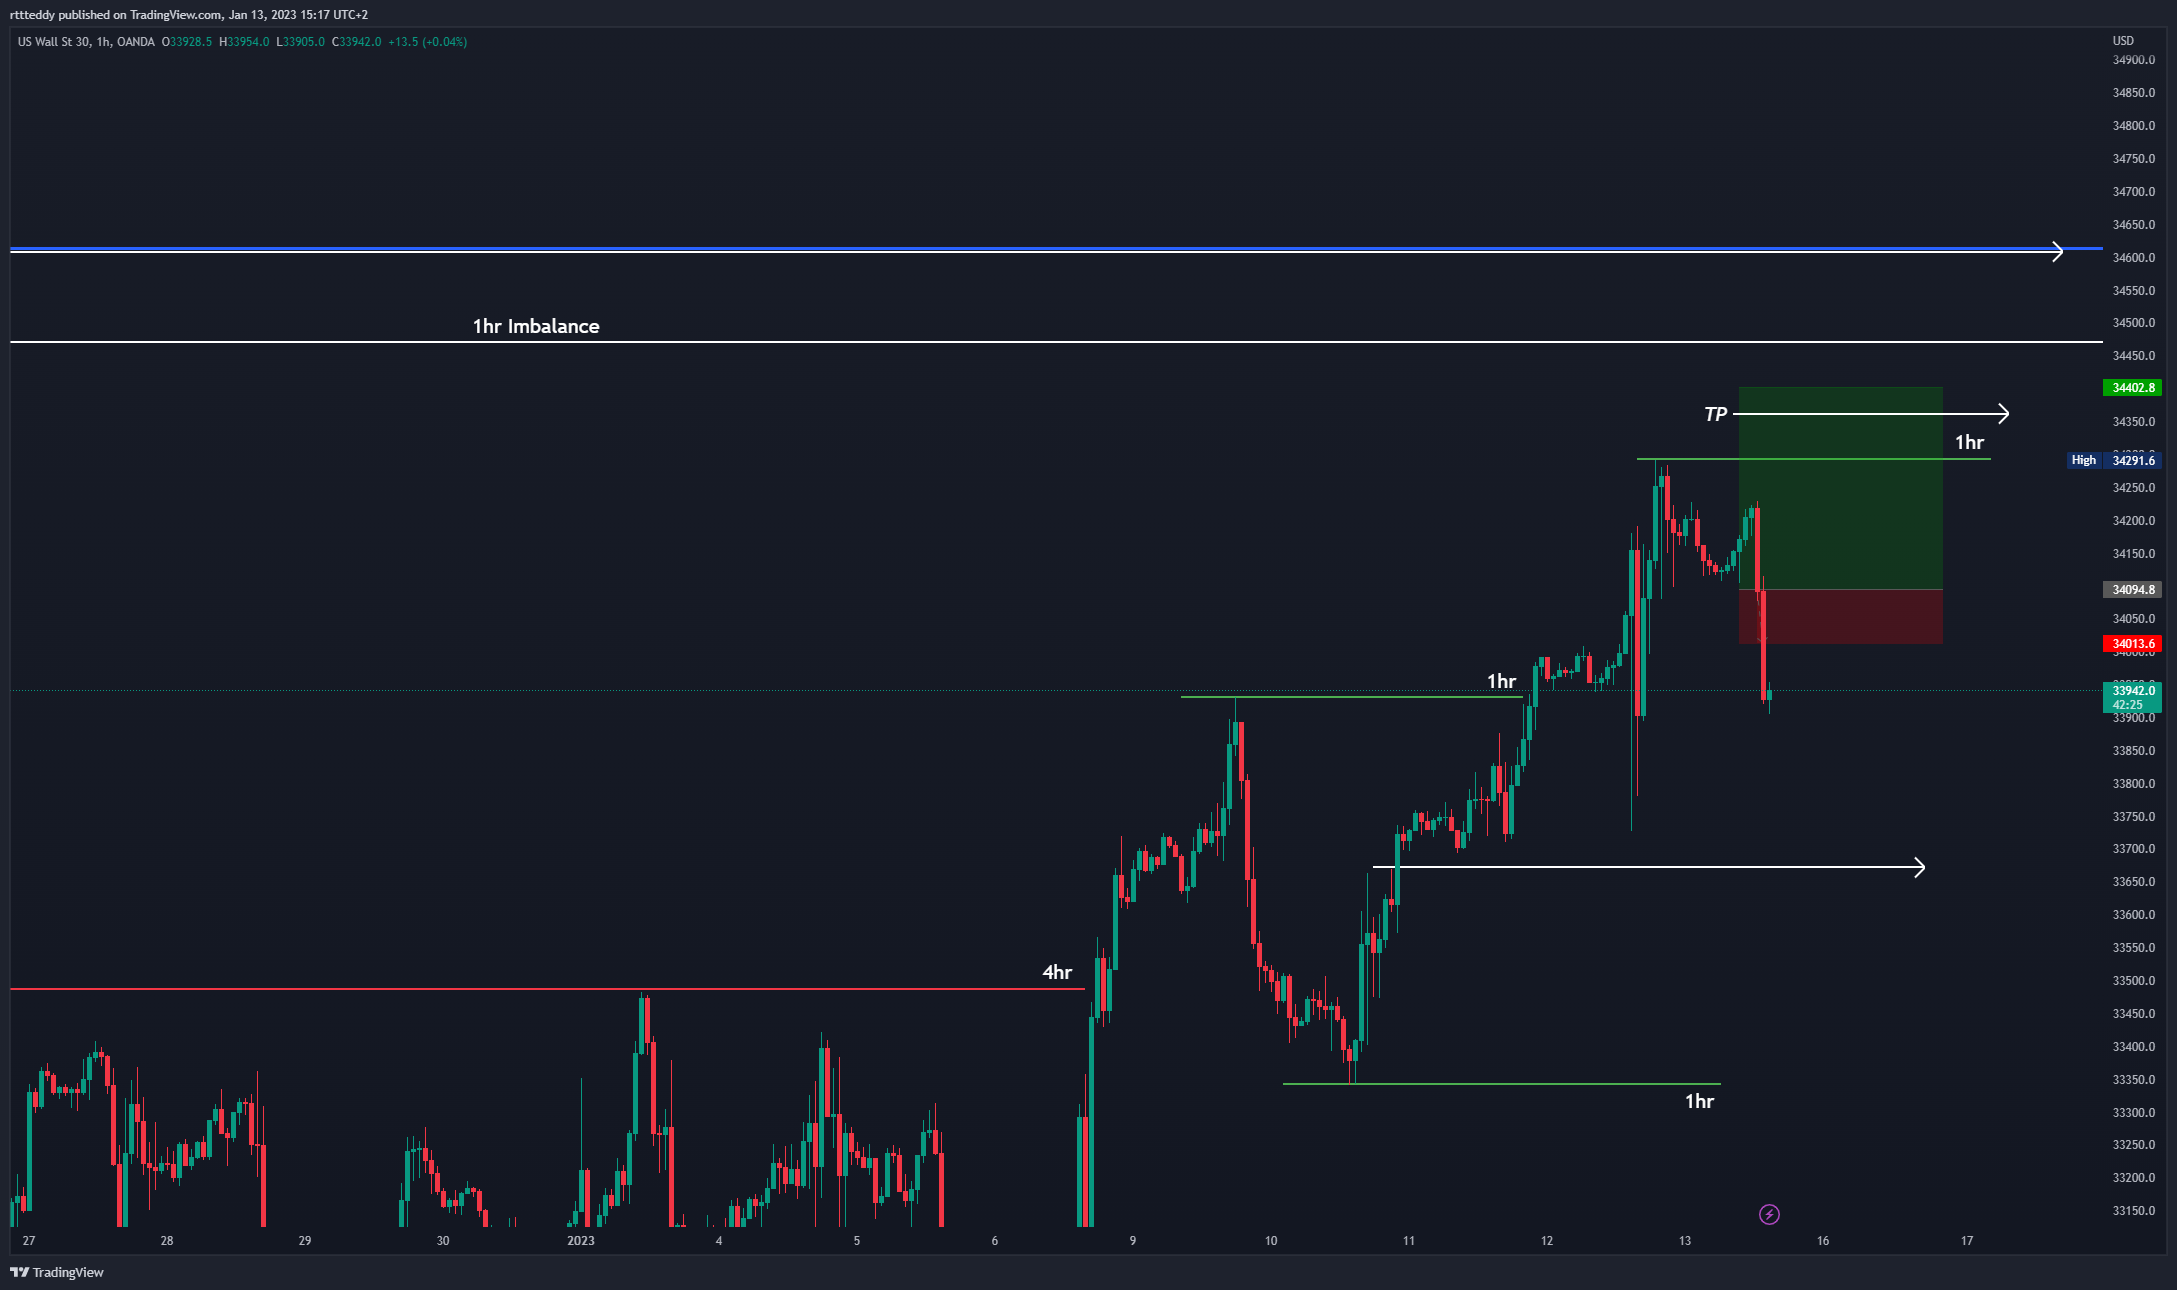

In [5]:
# 34186.4, 13083000, 34114.6, 34233.5 == 34362.1 Buy
display.Image("US30-13-01-23__2.png")

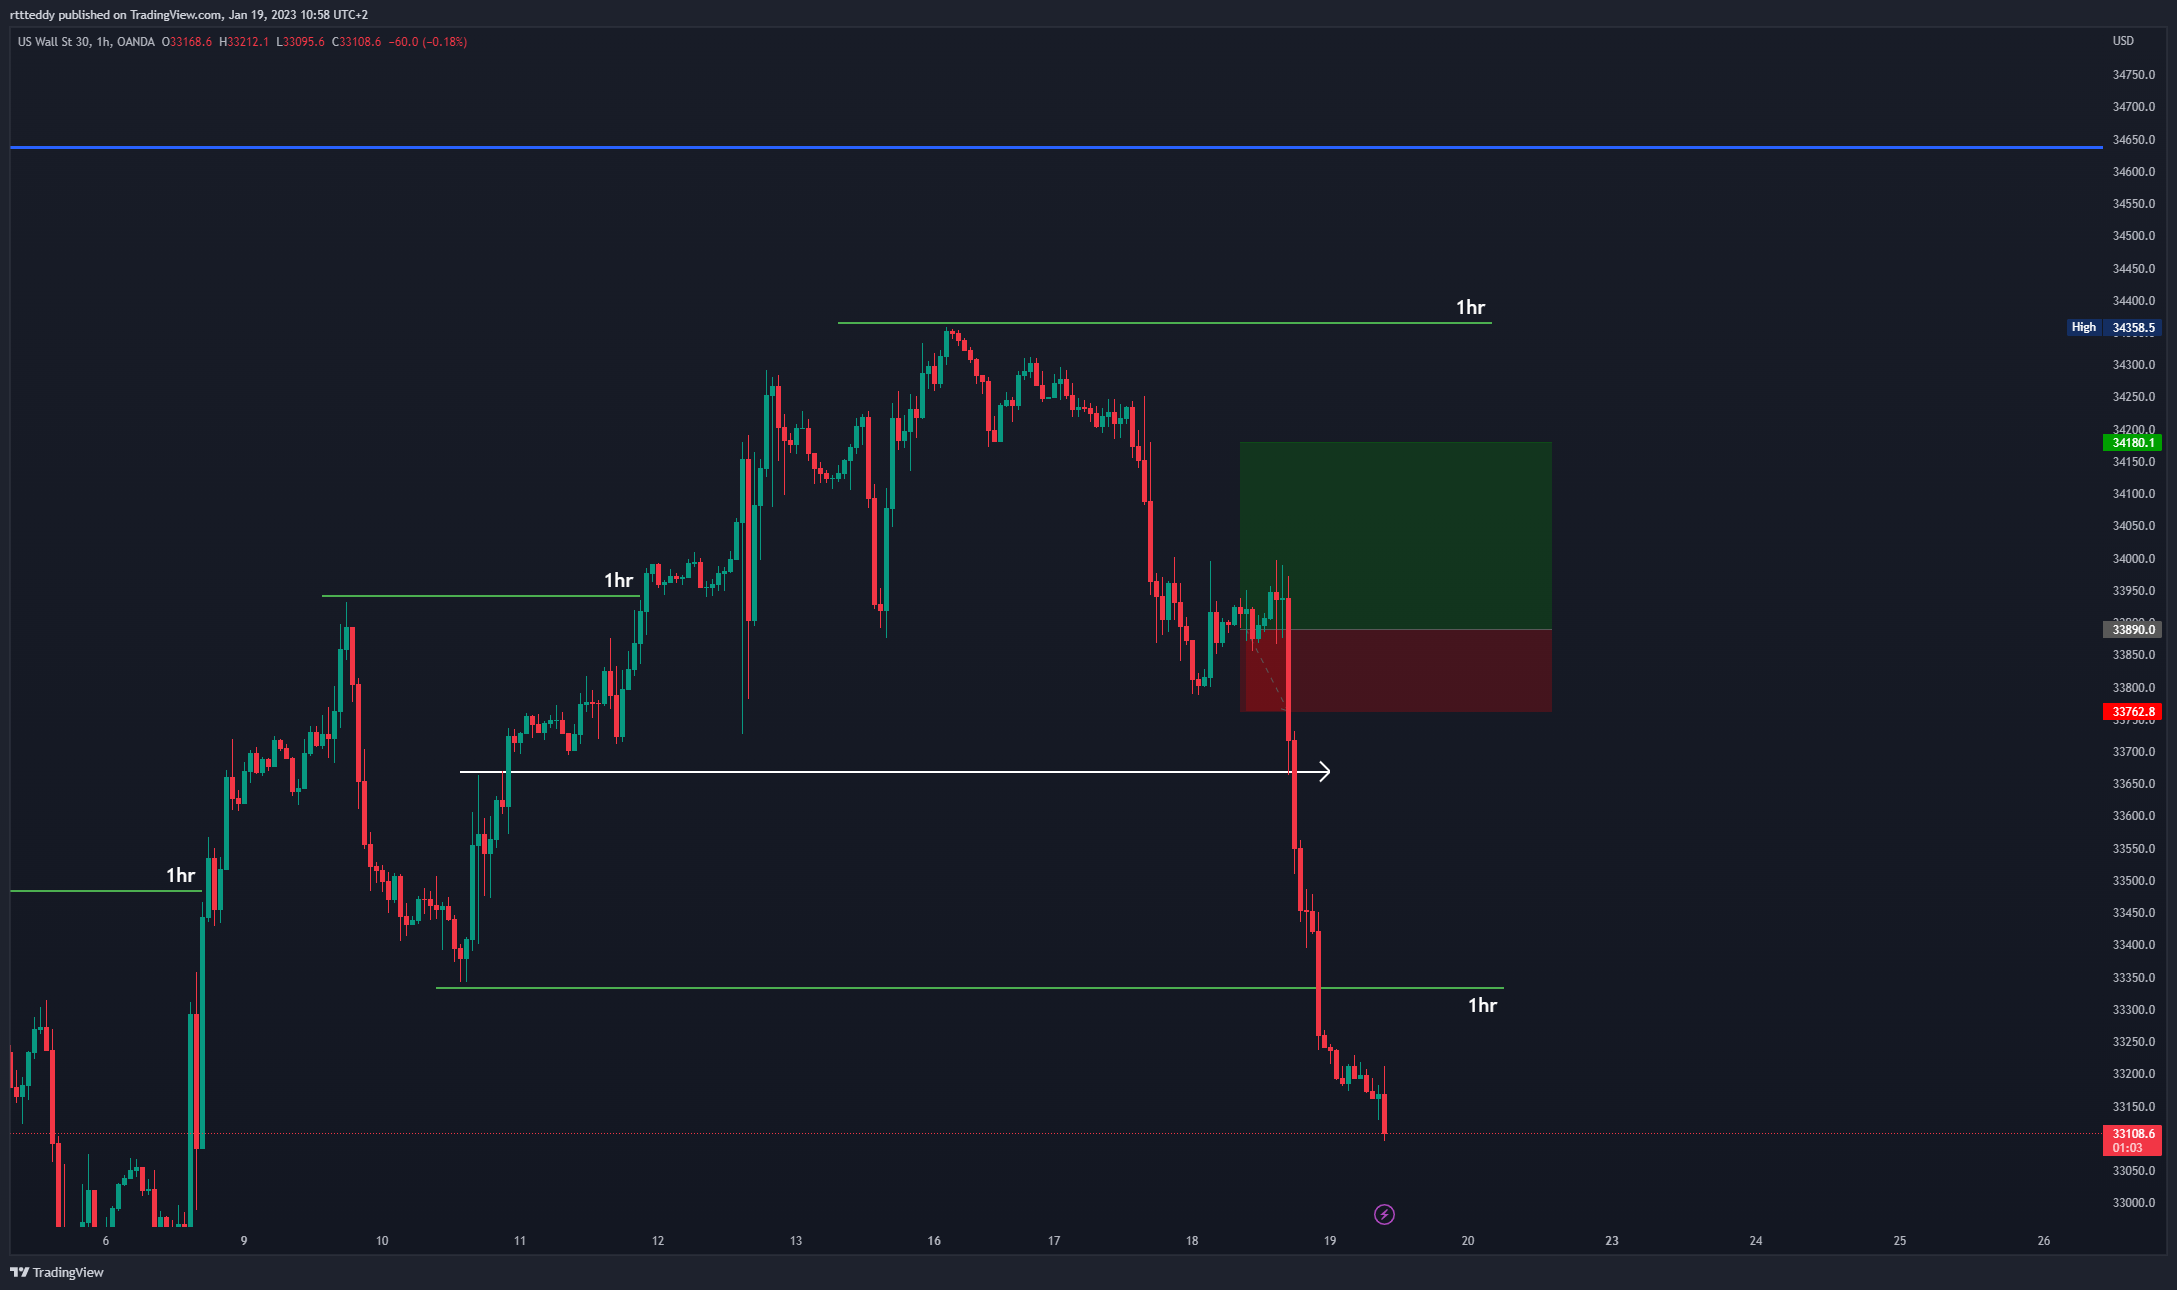

In [6]:
# 33877.0, 17117000.0, 33808.3, 34013.8 == 34180.44 Buy Major L
display.Image("US30-18-01-23.png")

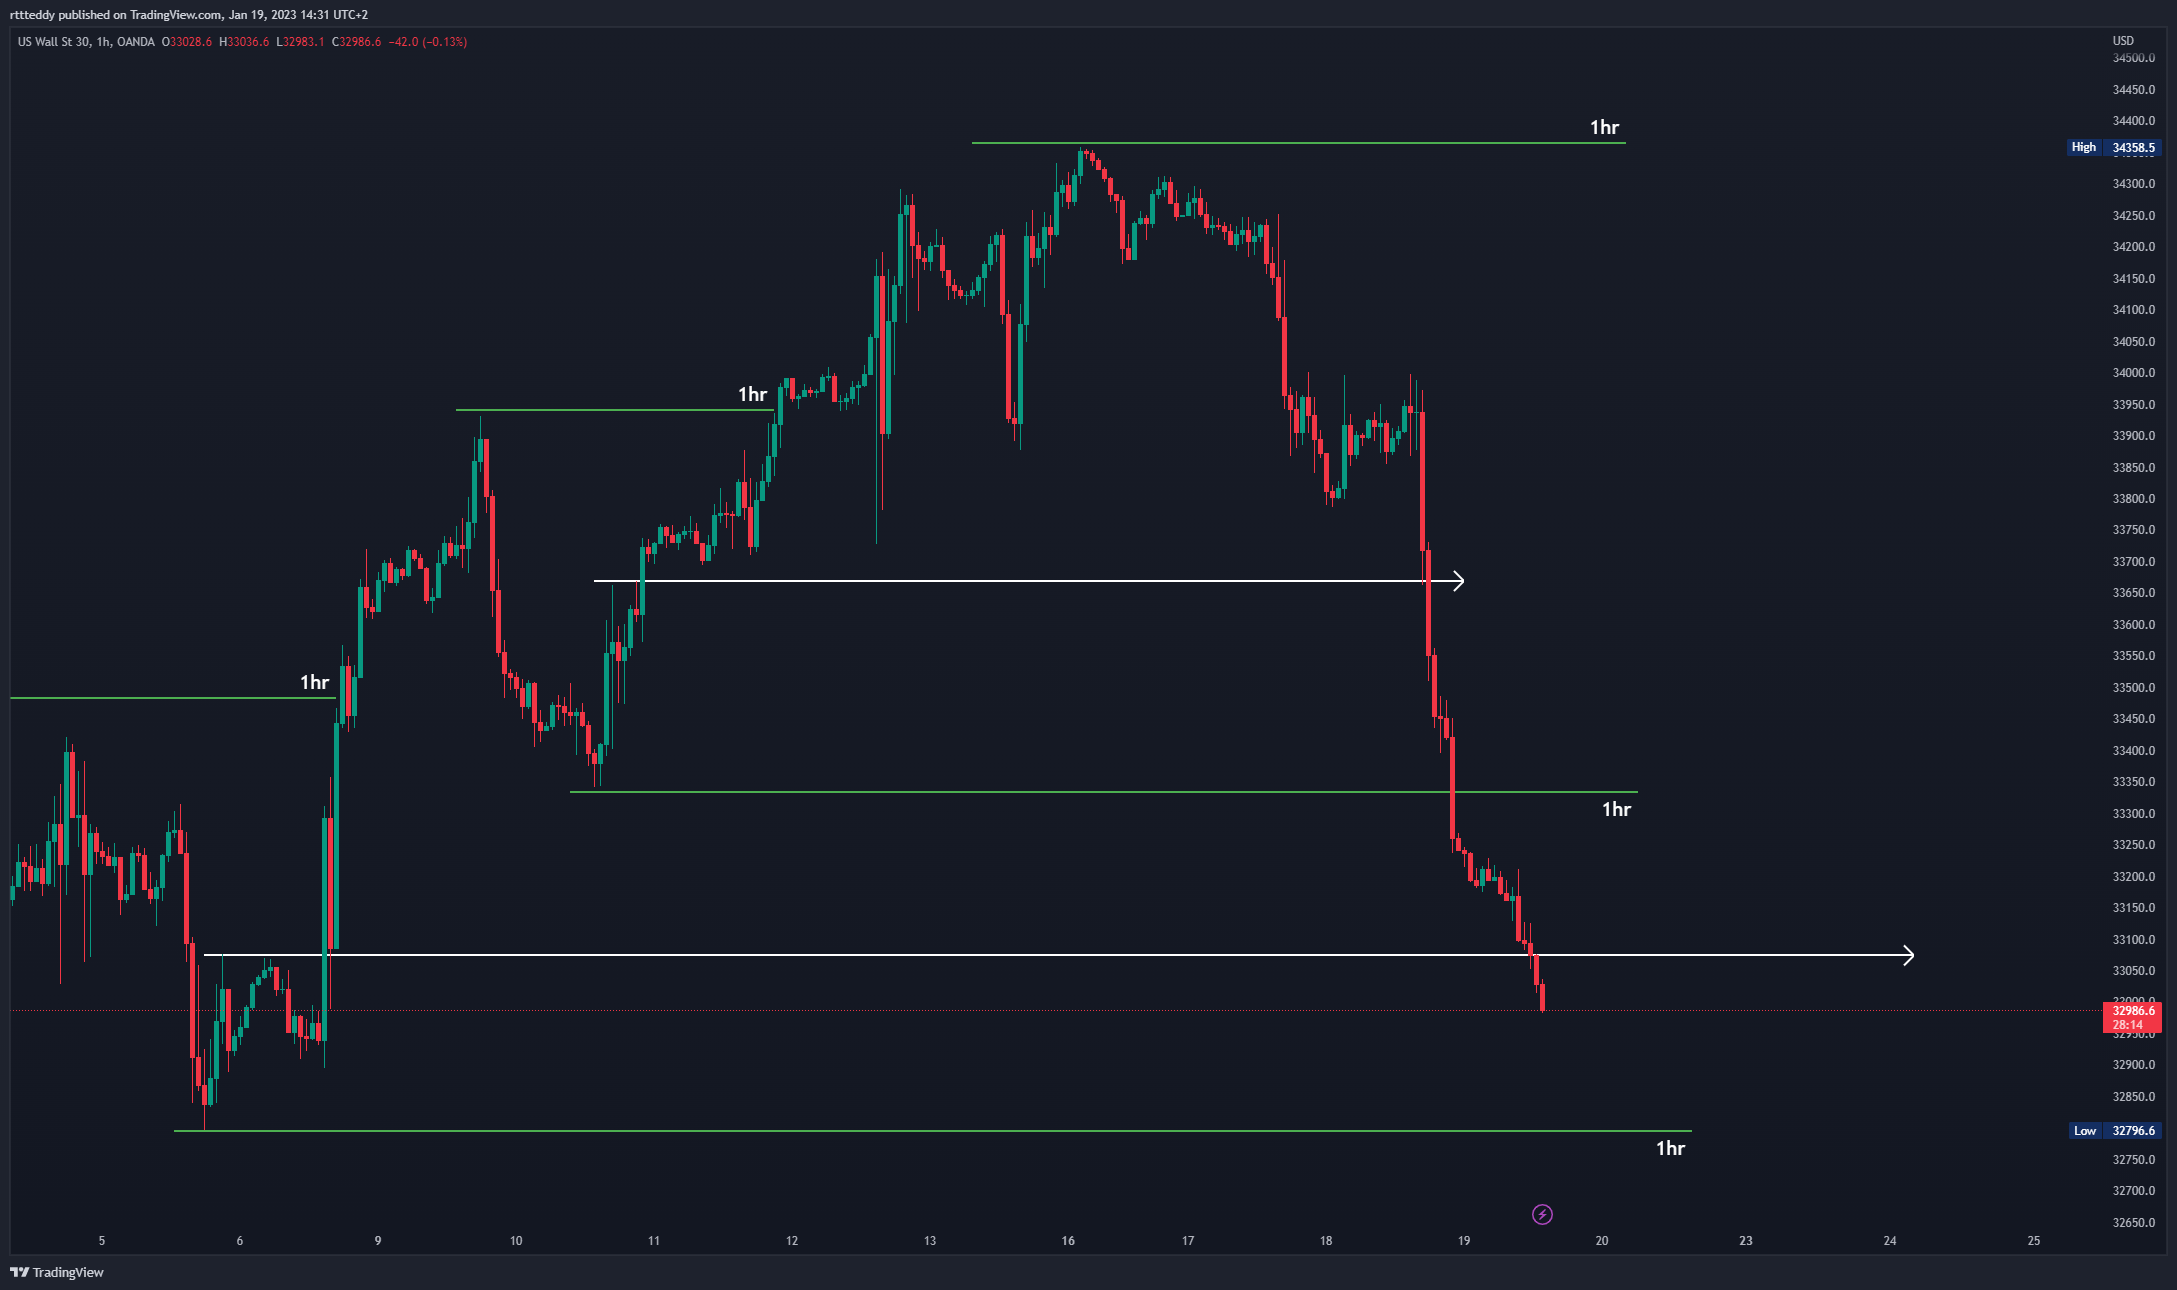

In [7]:
# 33253.7, 11153000, 33020.3, 33280.6 == 33343.88 & 33254.61 Buy L
display.Image("US30-19-01-23__1.png")

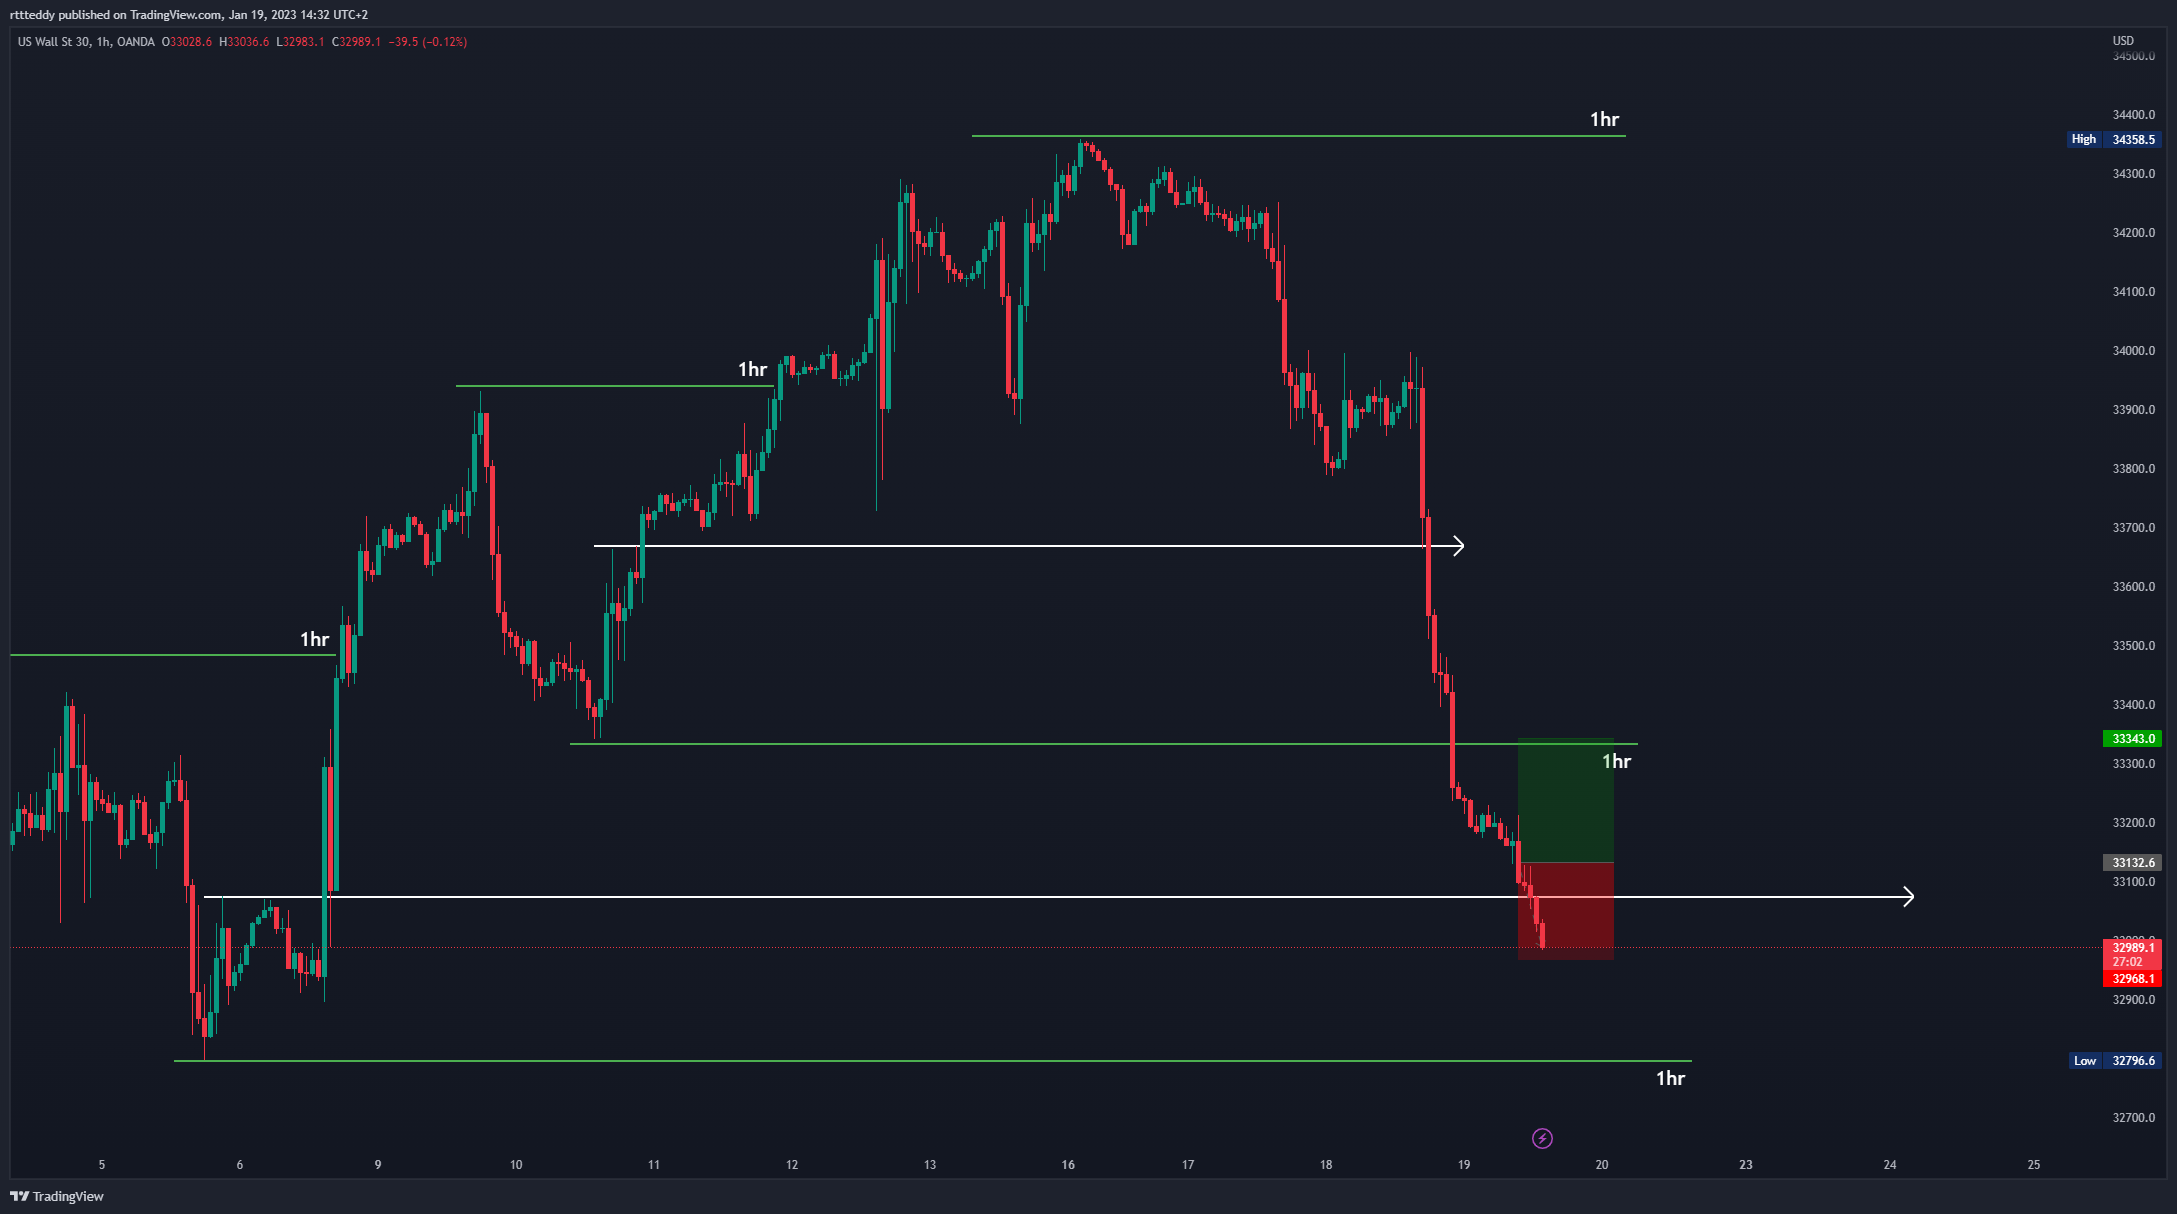

In [8]:
# 33253.7, 11153000, 33020.3, 33280.6 == 33343.88 & 33254.61 Buy L
display.Image("US30-19-01-23__2.png")

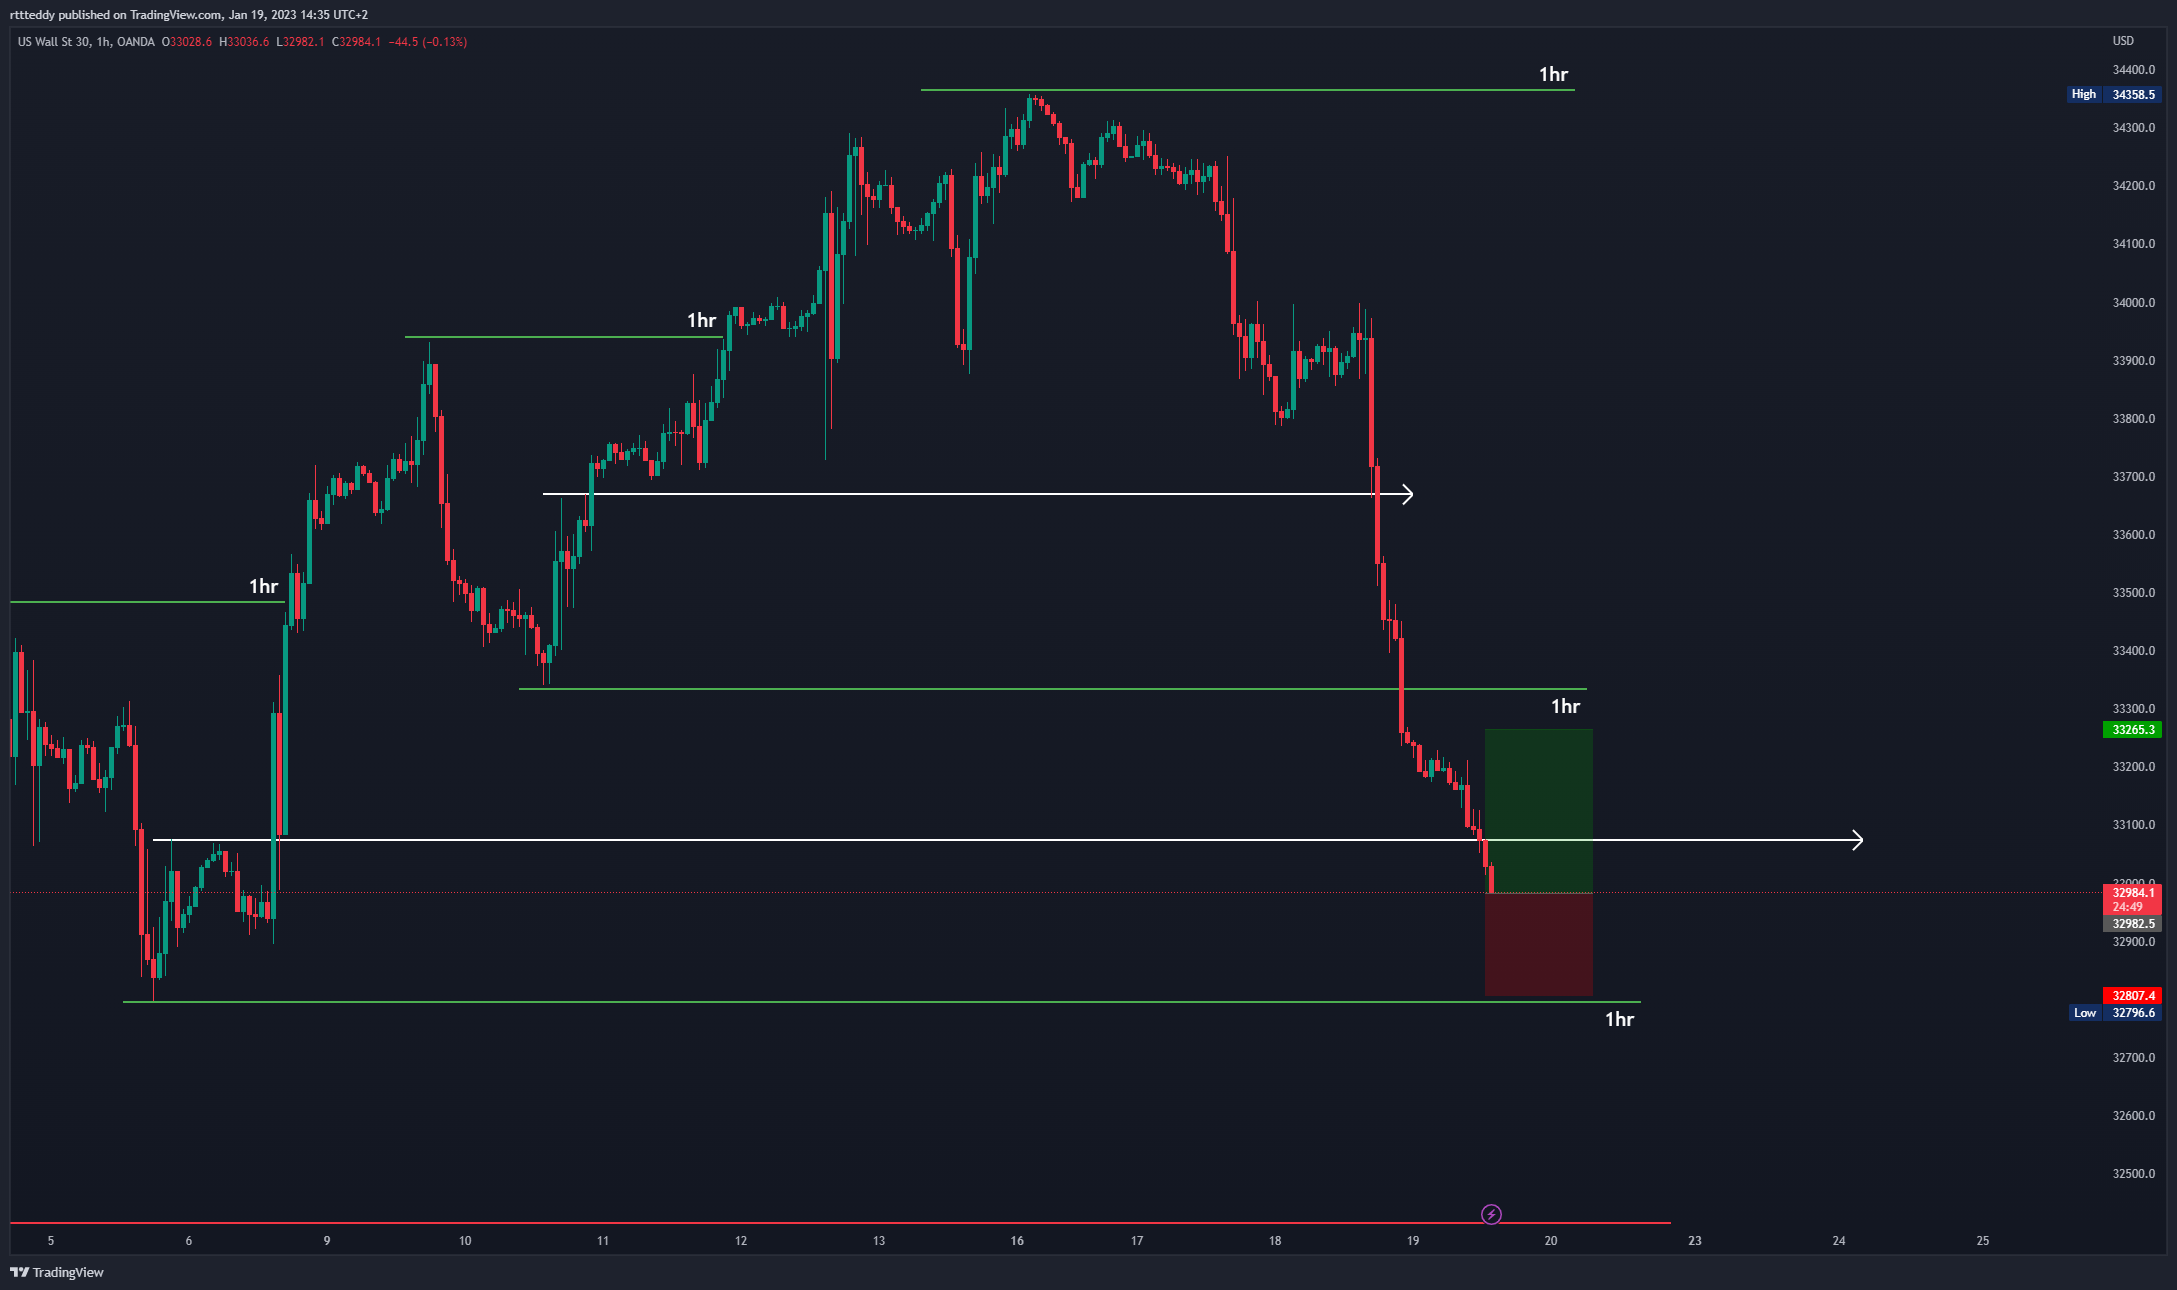

In [9]:
# 33253.7, 11153000, 33020.3, 33280.6 == 33343.88 & 33254.61 Buy L
display.Image("US30-19-01-23__3.png")

In [ ]:
#33253.7, 31571000, 32964.0, 33280.6 == 33498.96 Buy

In [ ]:
# News from Dec 13
    # Core CPI (MOM) == Down
    # Core CPI (YOY) == Down
    # CPI (MOM) == Down
    # Initial Job Claims == Up
# RESULTS
    # Core CPI (MOM) == Down
    # Core CPI (YOY) == Down
    # CPI (MOM) == Down
    # Initial Job Claims == Down
    
# Numbers Section
# 33980.2, 1335000.0, 33883.20, 34233.7 == 34125.21 Buy

In [ ]:
# News from Jan 12
    # Core CPI (MOM) == Up
    # Core CPI (YOY) == Down
    # CPI (MOM) == Down
    # Initial Job Claims == Up
# RESULTS
    # Core CPI (MOM) == 
    # Core CPI (YOY) == 
    # CPI (MOM) == Down
    # Initial Job Claims == 
    
# Numbers Section
# 33981.5, 12131000, 33931.7, 34000.4 == 34139.95 Buy

In [ ]:
import pickle
filename = 'us30_model'
pickle.dump(model,open(filename,'wb'))

In [ ]:
pickle.dump(model, open('us30.pkl', 'wb'))